In [1]:
import os
import copy
from coffea import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd

In [2]:
directory = 'CoffeaOutputsForTriggerAnalysis/SingleMu/'

In [3]:
Data_num2016 = util.load(directory+'2016/TTbarRes_0l_SingleMu2016_Data_TriggerAnalysis.coffea')

In [4]:
print(Data_num2016)

{'ttbarmass': <Hist (dataset,anacat,ttbarmass) instance at 0x7ff6ec099280>, 'jetmass': <Hist (dataset,anacat,jetmass) instance at 0x7ff6491fcc10>, 'SDmass': <Hist (dataset,anacat,jetmass) instance at 0x7ff64920df70>, 'SDmass_precat': <Hist (dataset,jetpt,jetmass) instance at 0x7ff6491b1250>, 'jetpt': <Hist (dataset,anacat,jetpt) instance at 0x7ff6491b1340>, 'jeteta': <Hist (dataset,anacat,jeteta) instance at 0x7ff6491c25e0>, 'jetphi': <Hist (dataset,anacat,jetphi) instance at 0x7ff6491d5940>, 'probept': <Hist (dataset,anacat,jetpt) instance at 0x7ff6491e6ca0>, 'probep': <Hist (dataset,anacat,jetp) instance at 0x7ff649179f40>, 'jety': <Hist (dataset,anacat,jety) instance at 0x7ff649194370>, 'jetdy': <Hist (dataset,anacat,jetdy) instance at 0x7ff6491a46d0>, 'deepTag_TvsQCD': <Hist (dataset,anacat,jetpt,tagger) instance at 0x7ff649136a60>, 'deepTagMD_TvsQCD': <Hist (dataset,anacat,jetpt,tagger) instance at 0x7ff649136b50>, 'tau32': <Hist (dataset,anacat,tau32) instance at 0x7ff649136b80>,

In [5]:
print("-------Unweighted SingleMu2016_Data--------")
for i,j in Data_num2016['cutflow'].items():        
    print( '%20s : %12d' % (i,j) )

-------Unweighted SingleMu2016_Data--------
          all events :     29045542
              jet id :      2138839
             jet kin :        99421
two FatJets and jet kin :        38314
     >= one oneTTbar :        38314
          dPhi > 2.1 :        19151
                sumw :        18577
               sumw2 :        18577
          AT&Pt0bcen :          177
          AT&Pt0bfwd :          143
          AT&Pt1bcen :          137
          AT&Pt1bfwd :          120
          AT&Pt2bcen :           24
          AT&Pt2bfwd :           15
             at0bcen :          901
             at0bfwd :          772
             at1bcen :          532
             at1bfwd :          519
             at2bcen :           58
             at2bfwd :           60
           pret0bcen :         1171
           pret0bfwd :         1031
           pret1bcen :          739
           pret1bfwd :          705
           pret2bcen :           99
           pret2bfwd :           90
             0t0b

In [6]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [7]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [8]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["0t", ">=1t"]
# btagcats = ["0b", "1b", "2b"]
# ycats = ['cen', 'fwd']

# list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
# list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]

# # ---- List the Histograms Here ---- #
# list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep')

In [9]:
maindirectory = os.getcwd() 

{}
{}


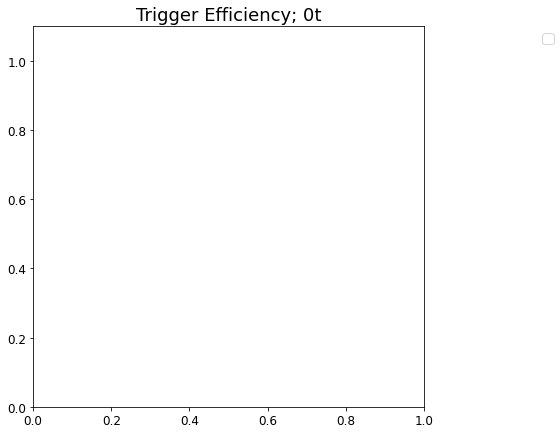

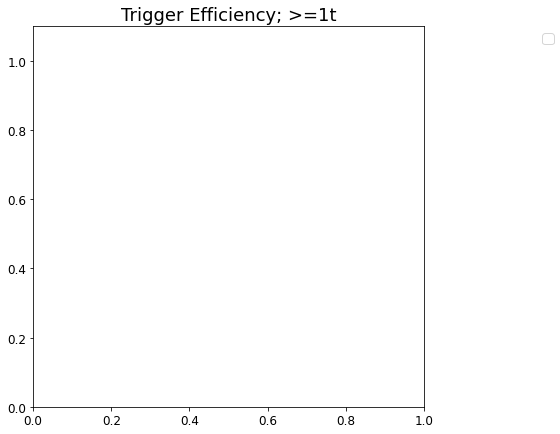

In [11]:
for cat in ttagcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(7,7),
    )
#     fig.subplots_adjust(hspace=.07)
    ax.set_title('Trigger Efficiency; ' + cat)
    
    Numerator1 = Data_num2016['condition1_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator2 = Data_num2016['condition2_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator3 = Data_num2016['condition3_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator4 = Data_num2016['condition4_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Denominator = Data_num2016['condition_denominator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    
    print(Denominator.values())
    
    # TestPlot = hist.plot1d(Denominator, ax=ax, clear=False, error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 1})
    
    # EffPlot1 = hist.plotratio(num = Numerator1, denom = Denominator, ax = ax, clear=False,
    #                error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 1},
    #                unc = 'num')
    # EffPlot2 = hist.plotratio(num = Numerator2, denom = Denominator, ax = ax, clear=False,
    #                error_opts={'marker': 'x', 'markersize': 7., 'color': 'g', 'elinewidth': 1},
    #                unc = 'num')
    # EffPlot3 = hist.plotratio(num = Numerator3, denom = Denominator, ax = ax, clear=False,
    #                error_opts={'marker': 's', 'markersize': 6., 'color': 'r', 'elinewidth': 1},
    #                unc = 'num')
    # EffPlot4 = hist.plotratio(num = Numerator4, denom = Denominator, ax = ax, clear=False,
    #                error_opts={'marker': '*', 'markersize': 7., 'color': 'b', 'elinewidth': 1},
    #                unc = 'num')
    
    ax.set_ylim(bottom=0, top=1.1)
    leg = ax.legend(labels=[r'$Condition_1$',r'$Condition_2$',r'$Condition_3$',r'$Condition_4$'], bbox_to_anchor=(1.35, 1.), loc='upper right')
    
#     ax.set_ylim(0, 1.2)
    